<a href="https://colab.research.google.com/github/AhmedRezaShams/Python/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
print(tf.__version__)

2.11.0


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='Cars.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('Cars.zip')
f.keys()
!unzip Cars.zip


Archive:  Cars.zip
   creating: Cars Dataset/
   creating: Cars Dataset/test/
   creating: Cars Dataset/test/Audi/
  inflating: Cars Dataset/test/Audi/1000.jpg  
  inflating: Cars Dataset/test/Audi/1003.jpg  
  inflating: Cars Dataset/test/Audi/1008.jpg  
  inflating: Cars Dataset/test/Audi/1020.jpg  
  inflating: Cars Dataset/test/Audi/1022.jpg  
  inflating: Cars Dataset/test/Audi/1025.jpg  
  inflating: Cars Dataset/test/Audi/1027.jpg  
  inflating: Cars Dataset/test/Audi/1038.jpg  
  inflating: Cars Dataset/test/Audi/104.jpg  
  inflating: Cars Dataset/test/Audi/1043.jpg  
  inflating: Cars Dataset/test/Audi/1051.jpg  
  inflating: Cars Dataset/test/Audi/1059.jpg  
  inflating: Cars Dataset/test/Audi/1060.jpg  
  inflating: Cars Dataset/test/Audi/1064.jpg  
  inflating: Cars Dataset/test/Audi/1066.jpg  
  inflating: Cars Dataset/test/Audi/1072.jpg  
  inflating: Cars Dataset/test/Audi/1073.jpg  
  inflating: Cars Dataset/test/Audi/1080.jpg  
  inflating: Cars Dataset/test/Audi/1084

In [ ]:
train_dir = '/content/Cars Dataset/train'
validation_dir = '/content/Cars Dataset/train'

BATCH_SIZE = 32
IMG_SIZE = (224, 224)
no_classes = 7

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 3352 files belonging to 7 classes.
Found 3352 files belonging to 7 classes.


In [ ]:
#Hasan Muhammad Kafi
class_names = train_dataset.class_names
print(class_names)

['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari', 'Toyota Innova']


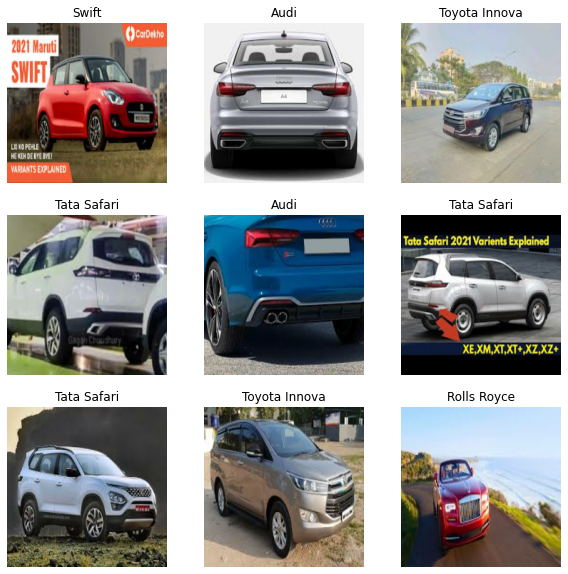

In [ ]:
#Hasan Muhammad Kafi
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(224, 224, 3))
x = layers.RandomContrast(0.2)(inputs)
x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(7, activation="softmax")(x)

model = keras.Model(inputs, outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 random_contrast_1 (RandomCo  (None, 224, 224, 3)      0         
 ntrast)                                                         
                                                                 
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 64)       0   

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_dataset,
    epochs=25,
    validation_data=validation_dataset,
)

Epoch 1/25


105/105 [==============================] - 335s 3s/step - loss: 59.7990 - accuracy: 0.2554 - val_loss: 1.7824 - val_accuracy: 0.3992
Epoch 2/25
105/105 [==============================] - 332s 3s/step - loss: 1.7097 - accuracy: 0.3741 - val_loss: 1.4846 - val_accuracy: 0.5427
Epoch 3/25
105/105 [==============================] - 331s 3s/step - loss: 1.4029 - accuracy: 0.5271 - val_loss: 0.9696 - val_accuracy: 0.7354
Epoch 4/25
105/105 [==============================] - 319s 3s/step - loss: 1.1669 - accuracy: 0.6149 - val_loss: 0.5931 - val_accuracy: 0.8291
Epoch 5/25
105/105 [==============================] - 318s 3s/step - loss: 0.8489 - accuracy: 0.7258 - val_loss: 0.4029 - val_accuracy: 0.8989
Epoch 6/25
105/105 [==============================] - 331s 3s/step - loss: 0.7015 - accuracy: 0.7846 - val_loss: 0.3528 - val_accuracy: 0.9153
Epoch 7/25
105/105 [==============================] - 328s 3s/step - loss: 0.5094 - accuracy: 0.8505 - val_loss: 0.1515 - val_accuracy: 0.9669
Epoch 8/2